# pandas 基础

---

导入库文件

In [81]:
import numpy as np
import pandas as pd

### 数据结构

##### Series

创建 Series

In [82]:
s = pd.Series(np.arange(5))
print(s)
s = pd.Series(np.arange(5), index=['a', 'b', 'c', 'd', 'e'])
print(s)
print(s.index)

d = {'a': 0, 'b': 1, 'c':2}
s = pd.Series(d)
print(s)
s = pd.Series(d, index = ['d', 'c', 'b', 'a'])
print(s)
s = pd.Series(5, index = ['a', 'b', 'c', 'd', 'e'])
print(s)

0    0
1    1
2    2
3    3
4    4
dtype: int64
a    0
b    1
c    2
d    3
e    4
dtype: int64
Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
a    0
b    1
c    2
dtype: int64
d    NaN
c    2.0
b    1.0
a    0.0
dtype: float64
a    5
b    5
c    5
d    5
e    5
dtype: int64


取值

In [83]:
s = pd.Series(np.arange(5) + 10, index = ['a', 'b', 'c', 'd', 'e'])
# index
print(s)
print(s[1])
print(s[:3])
print(s[s > s.median()])
print(s[[3, 1]])

# dict
print(s['b'])
print('c' in s)
print(s.get('f', np.nan))

a    10
b    11
c    12
d    13
e    14
dtype: int64
11
a    10
b    11
c    12
dtype: int64
d    13
e    14
dtype: int64
d    13
b    11
dtype: int64
11
True
nan


数值操作

In [84]:
s = pd.Series(np.arange(5), index = ['a', 'b', 'c', 'd', 'e'])
print(s + s)
print(s * 3)
print(np.exp(s))
print(s[1:])
# 没有相同 labels 时为空
print(s[1:] + s[:-1])

a    0
b    2
c    4
d    6
e    8
dtype: int64
a     0
b     3
c     6
d     9
e    12
dtype: int64
a     1.000000
b     2.718282
c     7.389056
d    20.085537
e    54.598150
dtype: float64
b    1
c    2
d    3
e    4
dtype: int64
a    NaN
b    2.0
c    4.0
d    6.0
e    NaN
dtype: float64


##### DataFrame

创建

In [85]:
# index
d = {'one': pd.Series([1, 2, 3], index = ['a', 'b', 'c']),
     'two': pd.Series([1, 2, 3, 4], index = ['a', 'b', 'c', 'd'])}

df = pd.DataFrame(d)
print(df)
df = pd.DataFrame(d, index = ['d', 'b', 'a'])
print(df)
df = pd.DataFrame(d, index = ['d', 'b', 'a'], columns = ['two', 'three'])
print(df)

   one  two
a  1.0    1
b  2.0    2
c  3.0    3
d  NaN    4
   one  two
d  NaN    4
b  2.0    2
a  1.0    1
   two three
d    4   NaN
b    2   NaN
a    1   NaN


In [86]:
# dict/list
d = {'one': [1, 2, 3, 4],
     'two': [4, 3, 2, 1]}

df = pd.DataFrame(d)
print(df)
df = pd.DataFrame(d, index = ['a', 'b', 'c', 'd'])
print(df)

   one  two
0    1    4
1    2    3
2    3    2
3    4    1
   one  two
a    1    4
b    2    3
c    3    2
d    4    1


In [87]:
# structured array
data = np.zeros((2,), dtype=[('A', 'i4'), ('B', 'f4'), ('C', 'a10')])
data[:] = [(1, 2., 'Hello'), (2, 3., 'Hello')]
print(data)
print(pd.DataFrame(data))
print(pd.DataFrame(data, index=['first', 'second']))
print(pd.DataFrame(data, columns=['C', 'B', 'A']))

[(1, 2., b'Hello') (2, 3., b'Hello')]
   A    B         C
0  1  2.0  b'Hello'
1  2  3.0  b'Hello'
        A    B         C
first   1  2.0  b'Hello'
second  2  3.0  b'Hello'
          C    B  A
0  b'Hello'  2.0  1
1  b'Hello'  3.0  2


In [88]:
# list of dicts
data = [{'a':  1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]
print(pd.DataFrame(data))
print(pd.DataFrame(data, index=['first', 'second']))
print(pd.DataFrame(data, columns=['a', 'b']))

   a   b     c
0  1   2   NaN
1  5  10  20.0
        a   b     c
first   1   2   NaN
second  5  10  20.0
   a   b
0  1   2
1  5  10


In [89]:
# dict of tuples
pd.DataFrame({('a', 'b'): {('A', 'B'): 1, ('A', 'C'): 2},
              ('a', 'a'): {('A', 'C'): 3, ('A', 'B'): 4},
              ('a', 'c'): {('A', 'B'): 5, ('A', 'C'): 6},
              ('b', 'a'): {('A', 'C'): 7, ('A', 'B'): 8},
              ('b', 'b'): {('A', 'D'): 9, ('A', 'B'): 10}})

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

In [90]:
# from_dict 可设置 orient 转换行和列
pd.DataFrame.from_dict(dict([('A', [1, 2, 3]), ('B', [4, 5, 6])]), orient='index')

,0,1,2
A,1,2,3
B,4,5,6


In [134]:
# from_records 可使用 index 设置列
data = np.array([(1, 2., b'Hello'), (2, 3., b'World')], dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])
print(data)
print(pd.DataFrame(data, index=['x', 'y']))
print(pd.DataFrame.from_records(data))
print(pd.DataFrame.from_records(data, index=['x', 'y']))
print(pd.DataFrame.from_records(data, index='B'))
print(pd.DataFrame.from_records(data, index='C'))

[(1, 2., b'Hello') (2, 3., b'World')]
   A    B         C
x  1  2.0  b'Hello'
y  2  3.0  b'World'
   A    B         C
0  1  2.0  b'Hello'
1  2  3.0  b'World'
   A    B         C
x  1  2.0  b'Hello'
y  2  3.0  b'World'
     A         C
B               
2.0  1  b'Hello'
3.0  2  b'World'
          A    B
C               
b'Hello'  1  2.0
b'World'  2  3.0


### 数据操作

In [187]:
df = pd.DataFrame({'one': [1, 2, 3], 
                   'two': [1, 2, 3], 
                   'three': [2, 4, 9]}, index=['a', 'b', 'c'])
print(df)

df['three'] = df['one'] * df['two']
df['flag'] = df['one'] > 1
print(df)

del df['two']
print(df)
three = df.pop('three')
print(df)

df['foo'] = 'bar'
print(df)

df['one_trunc'] = df['one'][:2]
print(df)

df.insert(1, 'bar', df['one'])
print(df)

   one  two  three
a    1    1      2
b    2    2      4
c    3    3      9
   one  two  three   flag
a    1    1      1  False
b    2    2      4   True
c    3    3      9   True
   one  three   flag
a    1      1  False
b    2      4   True
c    3      9   True
   one   flag
a    1  False
b    2   True
c    3   True
   one   flag  foo
a    1  False  bar
b    2   True  bar
c    3   True  bar
   one   flag  foo  one_trunc
a    1  False  bar        1.0
b    2   True  bar        2.0
c    3   True  bar        NaN
   one  bar   flag  foo  one_trunc
a    1    1  False  bar        1.0
b    2    2   True  bar        2.0
c    3    3   True  bar        NaN


In [190]:
df = pd.DataFrame({'one': [1, 2, 3], 
                   'two': [1, 2, 3], 
                   'three': [2, 4, 9]}, index=['a', 'b', 'c'])

dff = df.assign(other=df['one'] / df['three'])
print(df)
print(dff)
dff = df.assign(other=lambda x: x['one'] + 1)
print(df)
print(dff)

   one  two  three
a    1    1      2
b    2    2      4
c    3    3      9
   one  two  three     other
a    1    1      2  0.500000
b    2    2      4  0.500000
c    3    3      9  0.333333
   one  two  three
a    1    1      2
b    2    2      4
c    3    3      9
   one  two  three  other
a    1    1      2      2
b    2    2      4      3
c    3    3      9      4


In [250]:
df = pd.DataFrame({'one': [1, 2, 3], 
                   'two': [1, 2, 3], 
                   'three': [2, 4, 9]}, index=['a', 'b', 'c'])

print(df)
print(df.loc['b'])
print(df.iloc[2])
print(df.loc['c', 'three'])
print(df.loc['a':'b'])

   one  two  three
a    1    1      2
b    2    2      4
c    3    3      9
one      2
two      2
three    4
Name: b, dtype: int64
one      3
two      3
three    9
Name: c, dtype: int64
9
   one  two  three
a    1    1      2
b    2    2      4


In [255]:
df = pd.DataFrame({'one': [1, 2, 3], 
                   'two': [1, 2, 3], 
                   'three': [2, 4, 9]}, index=['a', 'b', 'c'])

print(df)
print(df[df.one > 1])
print(df[df > 1])
print(df[df.two.isin([1, 3])])

   one  two  three
a    1    1      2
b    2    2      4
c    3    3      9
   one  two  three
b    2    2      4
c    3    3      9
   one  two  three
a  NaN  NaN      2
b  2.0  2.0      4
c  3.0  3.0      9
   one  two  three
a    1    1      2
c    3    3      9


### 算术运算

In [229]:
df = pd.DataFrame(np.random.randn(10, 5), columns=['a', 'b', 'c', 'd', 'e'])
df2 = pd.DataFrame(np.random.randn(7, 3), columns=['a', 'b', 'c'])

print(df + df2)
print(df - df.iloc[0])
print(df * 5 + 2)
print(1 / df)
print(df ** 4)

          a         b         c   d   e
0 -0.784763  0.307183  1.391457 NaN NaN
1  0.934681 -1.190704  1.720644 NaN NaN
2  0.233405  0.453800 -1.146283 NaN NaN
3  2.033546 -0.325022  0.686667 NaN NaN
4 -0.370479 -0.056357  0.670427 NaN NaN
5  0.953203 -1.375230  0.553435 NaN NaN
6 -0.569290 -1.655582  0.617930 NaN NaN
7       NaN       NaN       NaN NaN NaN
8       NaN       NaN       NaN NaN NaN
9       NaN       NaN       NaN NaN NaN
          a         b         c         d         e
0  0.000000  0.000000  0.000000  0.000000  0.000000
1  2.223411 -0.049869  0.946420 -1.961621  1.449956
2  0.894992  0.008337  0.002835 -1.035968  1.756929
3  2.491086 -0.045814  0.533073 -0.548517 -0.123665
4  1.958932  0.183802  0.129448 -0.562595  1.263817
5  1.000687 -0.544883 -2.032000 -0.721831  1.471599
6  0.363422 -0.858943  1.321625 -0.546633  1.172747
7  0.231386  1.429475 -0.828509 -0.542947  0.184943
8  2.869006  0.801629  0.074472 -1.316691  1.663279
9  1.825993  1.067842  0.252012 -1.60554

**包含 date 的运算**

会列向广播

In [230]:
index = pd.date_range('1/1/2000', periods = 8)

df = pd.DataFrame(np.random.randn(8, 3), index = index, columns = list('ABC'))
print(df)

print(df - df['A'])

                   A         B         C
2000-01-01  0.333398 -0.054952 -0.618668
2000-01-02 -0.762901 -0.404033  1.325828
2000-01-03 -0.946147  1.571659  0.972079
2000-01-04  1.456920  0.277010 -2.277985
2000-01-05  0.862030  0.475965  1.327618
2000-01-06  0.337754 -1.496825  0.153446
2000-01-07 -1.668093 -0.895612 -1.886384
2000-01-08  0.562173  1.140714  0.470525
            2000-01-01 00:00:00  2000-01-02 00:00:00  2000-01-03 00:00:00  \
2000-01-01                  NaN                  NaN                  NaN   
2000-01-02                  NaN                  NaN                  NaN   
2000-01-03                  NaN                  NaN                  NaN   
2000-01-04                  NaN                  NaN                  NaN   
2000-01-05                  NaN                  NaN                  NaN   
2000-01-06                  NaN                  NaN                  NaN   
2000-01-07                  NaN                  NaN                  NaN   
2000-01-08     

### 逻辑运算

In [243]:
df1 = pd.DataFrame({'a': [3, 0, -1], 'b': [0, 1, 1]}, dtype=bool)
df2 = pd.DataFrame({'a': [0, 1, 1], 'b': [1, 1, 0]}, dtype=bool)

print(df1)
print(df1 & df2)
print(df1 | df2)
print(df1 ^ df2)
print(-df1)

       a      b
0   True  False
1  False   True
2   True   True
       a      b
0  False  False
1  False   True
2   True  False
      a     b
0  True  True
1  True  True
2  True  True
       a      b
0   True   True
1   True  False
2  False   True
       a      b
0  False   True
1   True  False
2  False  False


### 使用 numpy 库

In [249]:
df = pd.DataFrame(np.random.randn(3, 5))
print(df)
print(df.T)
print(np.exp(df))
print(np.asarray(df))

s = pd.Series([1, 2, 3, 4, 5])
print(np.exp(s))

          0         1         2         3         4
0  0.306910 -0.881694  0.939780  0.596585 -0.923235
1  0.053833  1.237064  0.799716 -0.728101 -0.461223
2 -0.025709 -1.321131 -0.788061 -0.571385 -0.112651
          0         1         2
0  0.306910  0.053833 -0.025709
1 -0.881694  1.237064 -1.321131
2  0.939780  0.799716 -0.788061
3  0.596585 -0.728101 -0.571385
4 -0.923235 -0.461223 -0.112651
          0         1         2         3         4
0  1.359219  0.414081  2.559418  1.815907  0.397232
1  1.055309  3.445483  2.224910  0.482825  0.630512
2  0.974618  0.266833  0.454726  0.564743  0.893463
[[ 0.30691    -0.88169411  0.93977973  0.59658523 -0.92323454]
 [ 0.05383344  1.23706413  0.79971639 -0.72810061 -0.46122342]
 [-0.02570918 -1.32113103 -0.78806108 -0.57138472 -0.1126508 ]]
0      2.718282
1      7.389056
2     20.085537
3     54.598150
4    148.413159
dtype: float64


### 丢失的数据

In [263]:
df = pd.DataFrame({'one': [1, 2, np.nan],
                   'two': [1, 2, 3],
                   'three': [1, np.nan, 3]})

print(df)
print(df.dropna())
print(df.dropna(how='any'))
print(df.fillna(5))
print(df.isna())

   one  two  three
0  1.0    1    1.0
1  2.0    2    NaN
2  NaN    3    3.0
   one  two  three
0  1.0    1    1.0
   one  two  three
0  1.0    1    1.0
   one  two  three
0  1.0    1    1.0
1  2.0    2    5.0
2  5.0    3    3.0
     one    two  three
0  False  False  False
1  False  False   True
2   True  False  False


### 其他操作

In [277]:
df = pd.DataFrame(np.arange(15).reshape(5, 3), columns=list('ABC'))

print(df)
print(df.mean())
print(df.mean(1))
print(df.sum())
print(df.sum(1))

    A   B   C
0   0   1   2
1   3   4   5
2   6   7   8
3   9  10  11
4  12  13  14
A    6.0
B    7.0
C    8.0
dtype: float64
0     1.0
1     4.0
2     7.0
3    10.0
4    13.0
dtype: float64
A    30
B    35
C    40
dtype: int64
0     3
1    12
2    21
3    30
4    39
dtype: int64


apply: 调用函数

In [315]:
df = pd.DataFrame(np.arange(15).reshape(3, 5), columns=list('ABCDE'))

print(df)
print(df.apply(np.cumsum))
print(df.apply(lambda x: x.max() - x.min()))

    A   B   C   D   E
0   0   1   2   3   4
1   5   6   7   8   9
2  10  11  12  13  14
    A   B   C   D   E
0   0   1   2   3   4
1   5   7   9  11  13
2  15  18  21  24  27
A    10
B    10
C    10
D    10
E    10
dtype: int64


直方图函数

In [295]:
s = pd.Series(np.random.randint(0, 7, size=10))
print(s)
print(s.value_counts())

0    6
1    0
2    6
3    1
4    0
5    2
6    4
7    0
8    4
9    1
dtype: int64
0    3
6    2
4    2
1    2
2    1
dtype: int64


连接函数(concat, merge, append)

In [341]:
df1 = pd.DataFrame(np.random.randn(10, 3))
print(df1)

df2 = pd.DataFrame(np.random.randn(10, 3))
print(df2)
print(pd.concat([df1[:3], df2[1:6]]))

df1 = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
df2 = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [3, 5]})
print(df1)
print(df2)
print(pd.merge(df1, df2, on='key'))

df1 = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
df2 = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [3, 5]})
print(df1)
print(df2)
print(pd.merge(df1, df2, on='key'))

df = pd.DataFrame(np.random.randn(8, 3), columns=list('ABC'))
print(df)
print(df.append(df.iloc[3], ignore_index=True))

          0         1         2
0 -1.285508 -1.324906 -1.168188
1  0.305015  1.685790 -2.152666
2  2.335725  0.594483 -0.664023
3  0.076089 -0.500892 -0.455123
4  1.089732  1.439271 -1.482990
5  1.519411  0.375227 -0.089621
6 -1.454561  0.866731  0.209684
7  1.080736  0.447506  0.307102
8 -1.015557  0.163751 -0.377634
9  0.242297 -0.795961 -0.689897
          0         1         2
0 -1.179023 -1.164865  1.021659
1  1.971447 -0.596679 -1.121079
2  1.616161 -0.083754  2.135327
3 -0.241179  2.264218 -0.313299
4  0.476147  0.124304  1.192932
5 -0.882835  1.271724  2.036673
6  0.629274  0.553067 -1.548465
7 -0.359195  0.136155 -0.604184
8  0.816060  0.272584 -1.362648
9  0.219129 -0.491771 -1.032331
          0         1         2
0 -1.285508 -1.324906 -1.168188
1  0.305015  1.685790 -2.152666
2  2.335725  0.594483 -0.664023
1  1.971447 -0.596679 -1.121079
2  1.616161 -0.083754  2.135327
3 -0.241179  2.264218 -0.313299
4  0.476147  0.124304  1.192932
5 -0.882835  1.271724  2.036673
   key  

Grouping

In [349]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'bar'],
                   'B': ['one', 'one', 'two', 'three', 'two', 'tow', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})

print(df)
print(df.groupby('A').sum())
print(df.groupby(['A', 'B']).sum())

     A      B         C         D
0  foo    one -0.371973 -0.766346
1  bar    one  2.506311  0.081730
2  foo    two  1.096826  0.218904
3  bar  three  0.377486 -0.966667
4  foo    two -0.209624  1.055059
5  bar    tow -1.280293 -0.637718
6  foo    one  0.035330 -0.061476
7  bar  three  0.314974  0.964512
            C         D
A                      
bar  1.918478 -0.558142
foo  0.550559  0.446140
                  C         D
A   B                        
bar one    2.506311  0.081730
    three  0.692460 -0.002154
    tow   -1.280293 -0.637718
foo one   -0.336643 -0.827822
    two    0.887202  1.273963
0  A          foo
   B          one
   C    -0.371973
   D    -0.766346
1  A          bar
   B          one
   C      2.50631
   D    0.0817301
2  A          foo
   B          two
   C      1.09683
   D     0.218904
3  A          bar
   B        three
   C     0.377486
   D    -0.966667
4  A          foo
   B          two
   C    -0.209624
   D      1.05506
5  A          bar
   B      

### Reshaping

1. Stack

In [353]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'bar'],
                   'B': ['one', 'one', 'two', 'three', 'two', 'tow', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})

print(df)
print(df.stack())
print(df.stack().unstack())

     A      B         C         D
0  foo    one -0.847904 -1.035614
1  bar    one  0.924530 -1.560261
2  foo    two -1.702611 -0.494159
3  bar  three -0.561232 -0.295863
4  foo    two  0.304010  1.960583
5  bar    tow -1.065019 -0.193310
6  foo    one -1.156186 -0.431564
7  bar  three -0.962752  0.784821
0  A         foo
   B         one
   C   -0.847904
   D    -1.03561
1  A         bar
   B         one
   C     0.92453
   D    -1.56026
2  A         foo
   B         two
   C    -1.70261
   D   -0.494159
3  A         bar
   B       three
   C   -0.561232
   D   -0.295863
4  A         foo
   B         two
   C     0.30401
   D     1.96058
5  A         bar
   B         tow
   C    -1.06502
   D    -0.19331
6  A         foo
   B         one
   C    -1.15619
   D   -0.431564
7  A         bar
   B       three
   C   -0.962752
   D    0.784821
dtype: object
     A      B         C         D
0  foo    one -0.847904  -1.03561
1  bar    one   0.92453  -1.56026
2  foo    two  -1.70261 -0.494159


2. Pivot tables

In [358]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})
print(df)
print(pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C']))

        A  B    C         D         E
0     one  A  foo  0.882803 -1.190901
1     one  B  foo -0.640033  1.415144
2     two  C  foo  0.583787  0.797457
3   three  A  bar -0.159312 -1.775118
4     one  B  bar -0.380190  1.120903
5     one  C  bar -1.733827 -0.839566
6     two  A  foo -2.386614  1.425258
7   three  B  foo -0.750410  0.976104
8     one  C  foo -0.179076 -0.488516
9     one  A  bar  0.044489 -0.178019
10    two  B  bar -0.120432  1.975754
11  three  C  bar -0.649913  0.320874
C             bar       foo
A     B                    
one   A  0.044489  0.882803
      B -0.380190 -0.640033
      C -1.733827 -0.179076
three A -0.159312       NaN
      B       NaN -0.750410
      C -0.649913       NaN
two   A       NaN -2.386614
      B -0.120432       NaN
      C       NaN  0.583787


### Time Series

In [369]:
rng = pd.date_range('1/1/2000', periods = 100, freq = 'D')

ts = pd.Series(np.random.randint(0, 500, len(rng)), index = rng)
print(ts)
print(ts.tz_localize('UTC').tz_convert('US/Eastern'))
print(ts.to_period())

2000-01-01    282
2000-01-02    350
2000-01-03    416
2000-01-04    158
2000-01-05    471
             ... 
2000-04-05    252
2000-04-06    160
2000-04-07    415
2000-04-08    394
2000-04-09    387
Freq: D, Length: 100, dtype: int64
1999-12-31 19:00:00-05:00    282
2000-01-01 19:00:00-05:00    350
2000-01-02 19:00:00-05:00    416
2000-01-03 19:00:00-05:00    158
2000-01-04 19:00:00-05:00    471
                            ... 
2000-04-04 20:00:00-04:00    252
2000-04-05 20:00:00-04:00    160
2000-04-06 20:00:00-04:00    415
2000-04-07 20:00:00-04:00    394
2000-04-08 20:00:00-04:00    387
Freq: D, Length: 100, dtype: int64
2000-01-01    282
2000-01-02    350
2000-01-03    416
2000-01-04    158
2000-01-05    471
             ... 
2000-04-05    252
2000-04-06    160
2000-04-07    415
2000-04-08    394
2000-04-09    387
Freq: D, Length: 100, dtype: int64


### Categoricals

In [382]:
df = pd.DataFrame({'id': [1, 2, 3, 4, 5, 6],
                   'raw_grade': ['a', 'b', 'b', 'a', 'a', 'e']})
print(df)
df['grade'] = df['raw_grade'].astype('category')
print(df)
df['grade'].cat.categories = ["very good", "good", "very bad"]
print(df)
df['grade'] = df['grade'].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
print(df)
print(df.sort_values(by='grade'))

   id raw_grade
0   1         a
1   2         b
2   3         b
3   4         a
4   5         a
5   6         e
   id raw_grade grade
0   1         a     a
1   2         b     b
2   3         b     b
3   4         a     a
4   5         a     a
5   6         e     e
   id raw_grade        grade
0   1         a    very good
1   2         b         good
2   3         b         good
3   4         a    very good
4   5         a    very good
5   6         e  very bad...
   id raw_grade        grade
0   1         a    very good
1   2         b         good
2   3         b         good
3   4         a    very good
4   5         a    very good
5   6         e  very bad...
   id raw_grade        grade
5   6         e  very bad...
1   2         b         good
2   3         b         good
0   1         a    very good
3   4         a    very good
4   5         a    very good


### Plotting

2000-01-01     1.113424
2000-01-02     2.443949
2000-01-03     2.161802
2000-01-04     1.947293
2000-01-05     1.475310
                ...    
2002-09-22   -41.455721
2002-09-23   -42.144791
2002-09-24   -42.451701
2002-09-25   -42.196639
2002-09-26   -41.048691
Freq: D, Length: 1000, dtype: float64


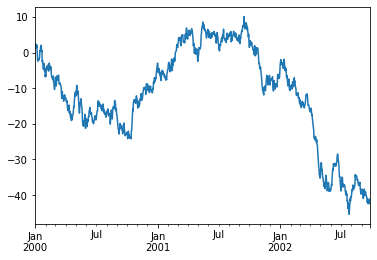

In [396]:
ts = pd.Series(np.random.randn(1000), index = pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
print(ts)

ts.plot()